# mESC-Oscope

Current working directory: /root/Cycle/Github


/tmp/ipykernel_23391/2629192024.py:39: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)


Silhouette score (rounded): -0.056


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


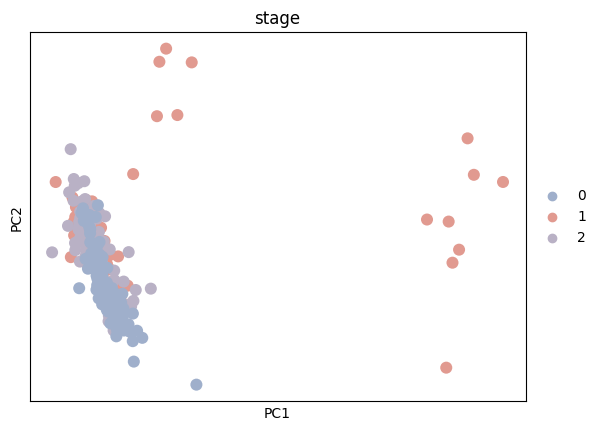

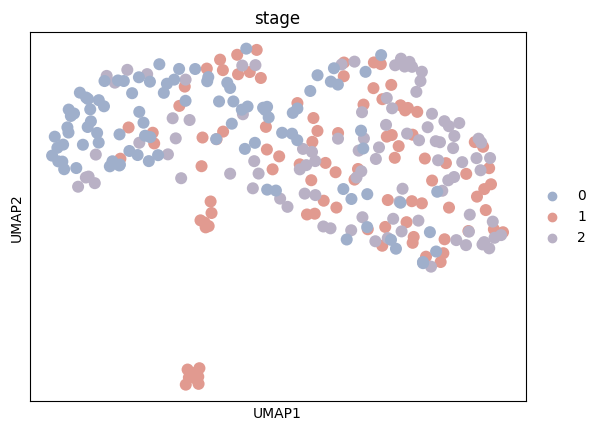

In [1]:
# ==============================
# Import required packages
# ==============================
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Add HarmoCycle module path
# ==============================
sys.path.append("./HarmoCycle/")

# Import custom functions
from HarmoCycle import *
from Utils import calculate_gene_oscillation_properties_v2, set_seed

# ==============================
# Load dataset and gene list
# ==============================
genes = pd.read_table('./Dataset/Oscope_output/mESC_union_genes.txt')['x'].values
adata = sc.read_h5ad('./Dataset/mESC.h5ad')

# Subset to selected genes
adata = adata[:, genes]

# ==============================
# Preprocessing
# ==============================
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA
sc.tl.pca(adata, svd_solver='arpack')

# ==============================
# Define stage colors
# ==============================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# ==============================
# PCA plot
# ==============================

# ==============================
# UMAP embedding
# ==============================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# ==============================
# Silhouette score (clustering quality)
# ==============================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ==============================
# Save results into ./FigurePlot/hESC/
# ==============================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_mESC_PCA.pdf", dpi=300)

# UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_mESC_UMAP.pdf", dpi=300)


# hESC-Oscope

Current working directory: /root/Cycle/Github


/tmp/ipykernel_23391/1953630566.py:39: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)


Silhouette score (rounded): 0.238


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


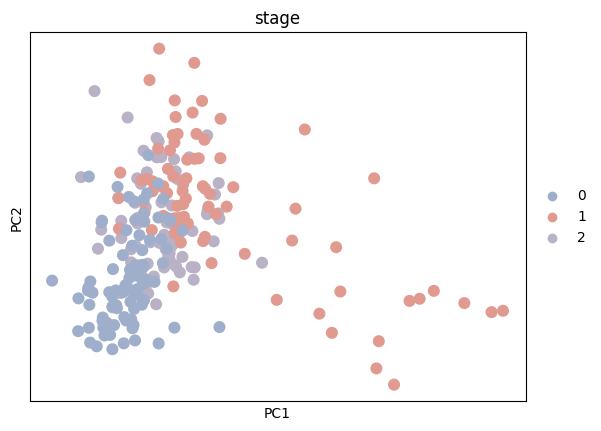

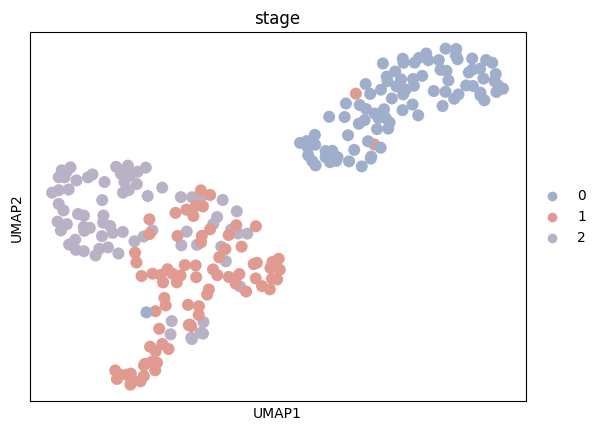

In [2]:
# ==============================
# Import required packages
# ==============================
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Add HarmoCycle module path
# ==============================
sys.path.append("./HarmoCycle/")

# Import custom functions
from HarmoCycle import *
from Utils import calculate_gene_oscillation_properties_v2, set_seed

# ==============================
# Load dataset and gene list
# ==============================
genes = pd.read_table('./Dataset/Oscope_output/hESC_union_genes.txt')['x'].values
adata = sc.read_h5ad('./Dataset/hESC.h5ad')

# Subset to selected genes
adata = adata[:, genes]

# ==============================
# Preprocessing
# ==============================
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA
sc.tl.pca(adata, svd_solver='arpack')

# ==============================
# Define stage colors
# ==============================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# ==============================
# PCA plot
# ==============================

# ==============================
# UMAP embedding
# ==============================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# ==============================
# Silhouette score (clustering quality)
# ==============================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ==============================
# Save results into ./FigurePlot/hESC/
# ==============================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_hESC_PCA.pdf", dpi=300)

# UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_hESC_UMAP.pdf", dpi=300)


# hU2OS-Oscope

Current working directory: /root/Cycle/Github


/tmp/ipykernel_23391/4247795819.py:39: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Silhouette score (rounded): 0.027


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


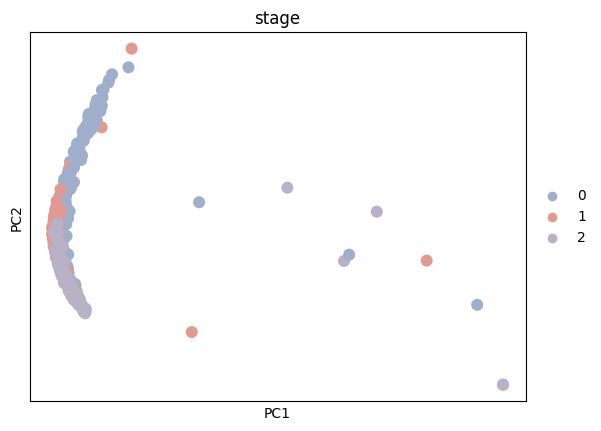

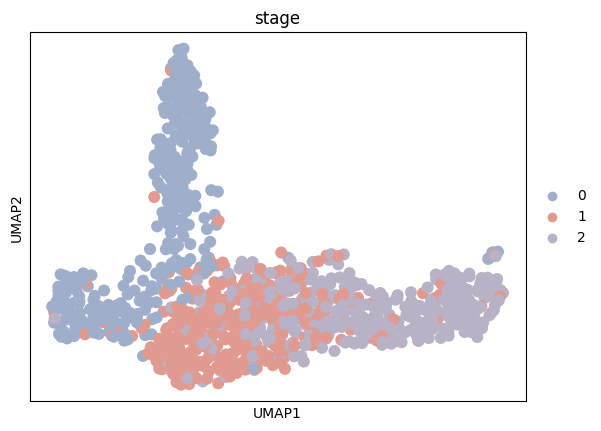

In [3]:
# ==============================
# Import required packages
# ==============================
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Add HarmoCycle module path
# ==============================
sys.path.append("./HarmoCycle/")

# Import custom functions
from HarmoCycle import *
from Utils import calculate_gene_oscillation_properties_v2, set_seed

# ==============================
# Load dataset and gene list
# ==============================
genes = pd.read_table('./Dataset/Oscope_output/hU2OS_union_genes.txt')['x'].values
adata = sc.read_h5ad('./Dataset/hU2OS.h5ad')

# Subset to selected genes
adata = adata[:, genes]

# ==============================
# Preprocessing
# ==============================
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA
sc.tl.pca(adata, svd_solver='arpack')

# ==============================
# Define stage colors
# ==============================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# ==============================
# PCA plot
# ==============================

# ==============================
# UMAP embedding
# ==============================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# ==============================
# Silhouette score (clustering quality)
# ==============================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ==============================
# Save results into ./FigurePlot/hESC/
# ==============================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_hU2OS_PCA.pdf", dpi=300)

# UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_hU2OS_UMAP.pdf", dpi=300)


# mESCQ-Oscope

Current working directory: /root/Cycle/Github


/tmp/ipykernel_23391/3226467225.py:39: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)


Silhouette score (rounded): 0.18


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


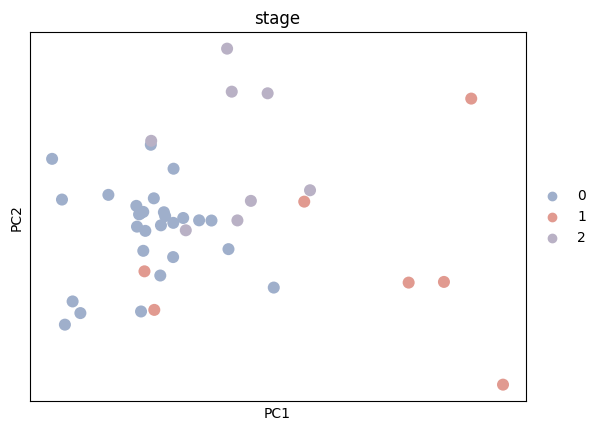

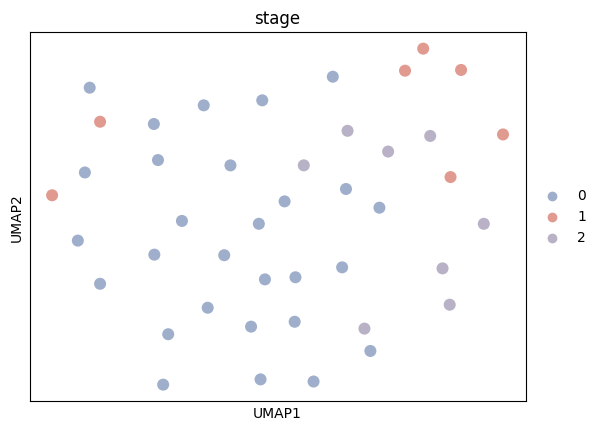

In [4]:
# ==============================
# Import required packages
# ==============================
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ==============================
# Set working directory
# ==============================
os.chdir("/root/Cycle/Github")
print("Current working directory:", os.getcwd())

# ==============================
# Add HarmoCycle module path
# ==============================
sys.path.append("./HarmoCycle/")

# Import custom functions
from HarmoCycle import *
from Utils import calculate_gene_oscillation_properties_v2, set_seed

# ==============================
# Load dataset and gene list
# ==============================
genes = pd.read_table('./Dataset/Oscope_output/mESCQ_union_genes.txt')['x'].values
adata = sc.read_h5ad('./Dataset/mESCQ.h5ad')

# Subset to selected genes
adata = adata[:, genes]

# ==============================
# Preprocessing
# ==============================
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA
sc.tl.pca(adata, svd_solver='arpack')

# ==============================
# Define stage colors
# ==============================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# ==============================
# PCA plot
# ==============================

# ==============================
# UMAP embedding
# ==============================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# ==============================
# Silhouette score (clustering quality)
# ==============================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ==============================
# Save results into ./FigurePlot/hESC/
# ==============================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_mESCQ_PCA.pdf", dpi=300)

# UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig("./FigurePlot/CyclingSpace/Oscope_mESCQ_UMAP.pdf", dpi=300)


# mESC-HarmoCycle

  features  highly_variable     means  dispersions  dispersions_norm  \
0  POLDIP3             True  2.332406     2.476393          0.961741   
1    UBE2C             True  1.736467     2.337224          1.176769   
2     PRC1             True  1.731604     3.002395          1.764149   
3     LDHB             True  2.725338     2.331647          1.049307   
4  MT-CYTB             True  4.488899     3.631045          1.152702   

   dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
0                       1            0.549529           -0.132893   
1                       1            0.547454            1.122154   
2                       1            0.523320            1.042621   
3                       1            0.494638           -0.972679   
4                       1            0.463824           -2.152980   

   dominant_phase_deg  dominant_phase_norm  
0          352.385800             0.478849  
1           64.294710             0.678596  
2           59.73

/tmp/ipykernel_23391/2117508707.py:42: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)


Silhouette score (rounded): 0.094


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


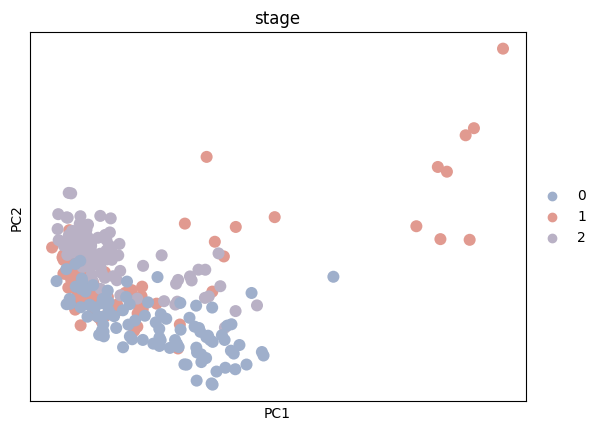

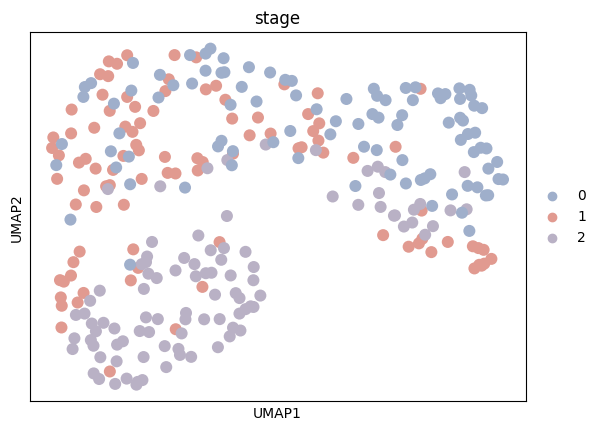

In [5]:
import pandas as pd
import scanpy as sc
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ============================================
# Load CSV file containing sorted features
# ============================================
file_path = "./Experiment/Temp_Result/mESC_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/mESC_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df['features'].head(n_genes).values
print("Number of selected features:", len(selected_features))

# ============================================
# Load single-cell dataset
# ============================================
adata = sc.read_h5ad('./Dataset/mESC.h5ad')

# Subset to selected genes
adata = adata[:, selected_features]

# ============================================
# Preprocessing
# ============================================
# Convert stage labels to string type
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize counts per cell, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA computation
sc.tl.pca(adata, svd_solver='arpack')

# ============================================
# Define stage colors
# ============================================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# PCA plot

# ============================================
# UMAP embedding
# ============================================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# UMAP plot

# ============================================
# Silhouette score (clustering quality)
# ============================================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ============================================
# Save plots into ./FigurePlot/CyclingSpace/
# ============================================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# Save PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_mESC_PCA.pdf"), dpi=300)

# Save UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_mESC_UMAP.pdf"), dpi=300)


# hESC-HarmoCycle

          highly_variable     means  dispersions  dispersions_norm  \
HIST1H4C             True  2.080734     1.463660          3.386529   
CDK1                 True  1.257924     0.682214          2.213694   
TOP2A                True  1.705273     1.162954          2.790735   
AASS                 True  2.423916     1.661024          2.571950   
CCNB1                True  1.933370     0.583966          1.723482   

          dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
HIST1H4C                       1            0.825774            2.296184   
CDK1                           1            0.625172            1.863293   
TOP2A                          1            0.558951            1.343494   
AASS                           1            0.552118            2.784463   
CCNB1                          1            0.512446           -0.123412   

          dominant_phase_deg  dominant_phase_norm  
HIST1H4C           131.56168             0.865449  
CDK1              

/tmp/ipykernel_23391/1828987711.py:42: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)


Silhouette score (rounded): 0.313


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


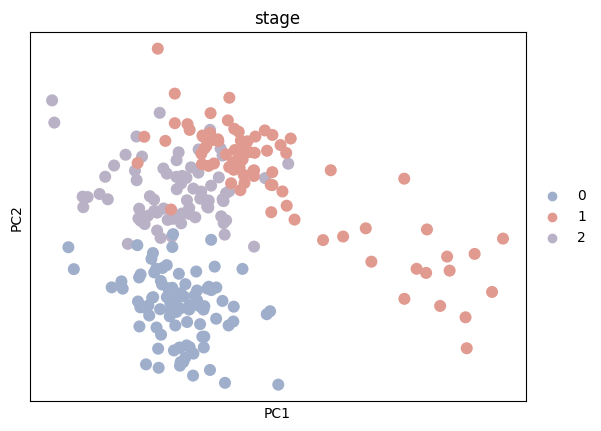

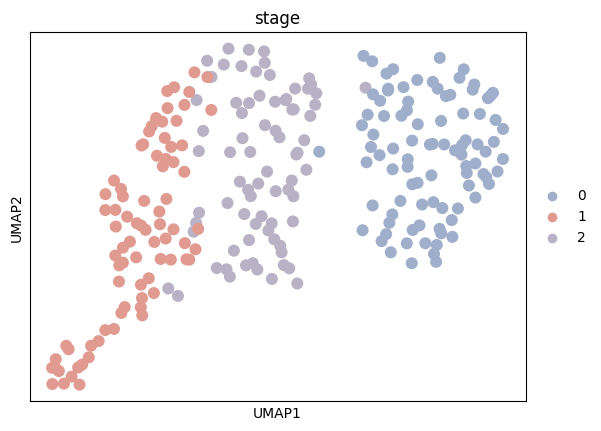

In [6]:
import pandas as pd
import scanpy as sc
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ============================================
# Load CSV file containing sorted features
# ============================================
file_path = "./Experiment/Temp_Result/hESC_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path, index_col=0)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/hESC_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df.head(n_genes).index.tolist()
print("Number of selected features:", len(selected_features))

# ============================================
# Load single-cell dataset
# ============================================
adata = sc.read_h5ad('./Dataset/hESC.h5ad')

# Subset to selected genes
adata = adata[:, selected_features]

# ============================================
# Preprocessing
# ============================================
# Convert stage labels to string type
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize counts per cell, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA computation
sc.tl.pca(adata, svd_solver='arpack')

# ============================================
# Define stage colors
# ============================================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# PCA plot

# ============================================
# UMAP embedding
# ============================================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# UMAP plot

# ============================================
# Silhouette score (clustering quality)
# ============================================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ============================================
# Save plots into ./FigurePlot/CyclingSpace/
# ============================================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# Save PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_hESC_PCA.pdf"), dpi=300)

# Save UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_hESC_UMAP.pdf"), dpi=300)


# hU2OS-HarmoCycle

       highly_variable     means  dispersions  dispersions_norm  \
CCNB1             True  2.258128     1.664513          2.378023   
TOP2A             True  1.869244     1.173289          1.568885   
UBE2C             True  1.616754     1.276701          1.760679   
CDC20             True  2.023471     1.284540          1.705776   
CDK1              True  1.464084     1.187809          2.273354   

       dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
CCNB1                       1            0.895442            0.348597   
TOP2A                       1            0.876763           -0.602657   
UBE2C                       1            0.833371           -0.580721   
CDC20                       1            0.806269            0.288613   
CDK1                        1            0.792194           -0.948519   

       dominant_phase_deg  dominant_phase_norm  
CCNB1           19.973145             0.555481  
TOP2A          325.470300             0.404084  
UBE2C      

/tmp/ipykernel_23391/2858548469.py:42: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:196: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


Silhouette score (rounded): 0.099


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


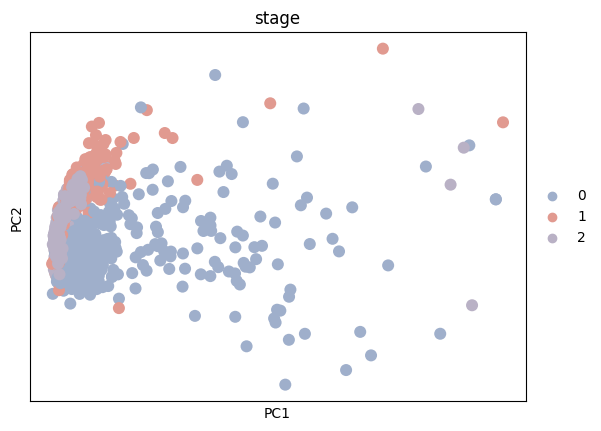

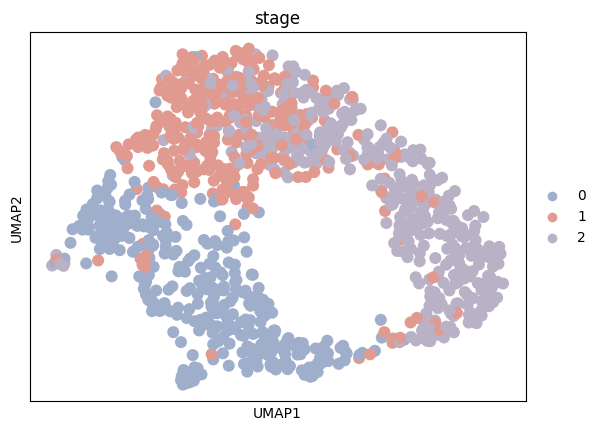

In [7]:
import pandas as pd
import scanpy as sc
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ============================================
# Load CSV file containing sorted features
# ============================================
file_path = "./Experiment/Temp_Result/hU2OS_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path, index_col=0)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/hU2OS_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df.head(n_genes).index.tolist()
print("Number of selected features:", len(selected_features))

# ============================================
# Load single-cell dataset
# ============================================
adata = sc.read_h5ad('./Dataset/hU2OS.h5ad')

# Subset to selected genes
adata = adata[:, selected_features]

# ============================================
# Preprocessing
# ============================================
# Convert stage labels to string type
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize counts per cell, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA computation
sc.tl.pca(adata, svd_solver='arpack')

# ============================================
# Define stage colors
# ============================================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# PCA plot

# ============================================
# UMAP embedding
# ============================================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# UMAP plot

# ============================================
# Silhouette score (clustering quality)
# ============================================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ============================================
# Save plots into ./FigurePlot/CyclingSpace/
# ============================================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# Save PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_hU2OS_PCA.pdf"), dpi=300)

# Save UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_hU2OS_UMAP.pdf"), dpi=300)


# mESCQ-HarmoCycle

             highly_variable     means  dispersions  dispersions_norm  \
features                                                                
MMU-MIR-703             True  2.960110     2.915235          3.713043   
TUBB2C                  True  2.084217     1.061022          2.286165   
UBE2C                   True  0.936423     0.837889          2.614537   
GM10259                 True  0.868634     0.514419          2.180937   
GM10184                 True  0.868606     0.514561          2.181127   

             dominant_frequency_bin  dominant_amplitude  dominant_phase_rad  \
features                                                                      
MMU-MIR-703                       1            1.011625           -1.105859   
TUBB2C                            1            0.663818           -2.256507   
UBE2C                             1            0.609938           -2.402743   
GM10259                           1            0.503232           -2.194234   
GM10184       

/tmp/ipykernel_23391/2008537514.py:42: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['stage'] = adata.obs['stage'].astype(str)


Silhouette score (rounded): 0.135


/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/root/anaconda3/envs/HT2VEC/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


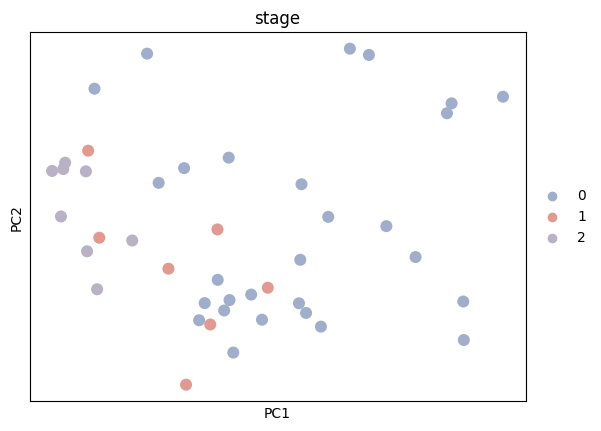

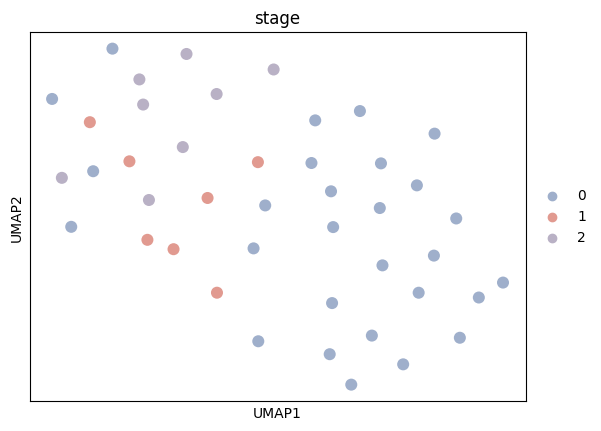

In [8]:
import pandas as pd
import scanpy as sc
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# ============================================
# Load CSV file containing sorted features
# ============================================
file_path = "./Experiment/Temp_Result/mESCQ_var_sorted_by_dominant_amplitude.csv"
df = pd.read_csv(file_path, index_col=0)

# Inspect first few rows and column names
print(df.head())
print(df.columns)

# ============================================
# Load union genes list
# ============================================
genes = pd.read_table('./Dataset/Oscope_output/mESCQ_union_genes.txt')['x'].values
n_genes = len(genes)
print("Number of union genes:", n_genes)

# Select the top n_genes features from the CSV file
# Assumes the CSV has a column named 'features' containing gene names
selected_features = df.head(n_genes).index.tolist()
print("Number of selected features:", len(selected_features))

# ============================================
# Load single-cell dataset
# ============================================
adata = sc.read_h5ad('./Dataset/mESCQ.h5ad')

# Subset to selected genes
adata = adata[:, selected_features]

# ============================================
# Preprocessing
# ============================================
# Convert stage labels to string type
adata.obs['stage'] = adata.obs['stage'].astype(str)

# Normalize counts per cell, log-transform, and scale
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.scale(adata, max_value=10)

# PCA computation
sc.tl.pca(adata, svd_solver='arpack')

# ============================================
# Define stage colors
# ============================================
stage_colors = {'0': '#9FAFCB', '1': '#E19A90', '2': '#B9B1C5'}
adata.obs['stage_color'] = adata.obs['stage'].map(stage_colors)

# PCA plot

# ============================================
# UMAP embedding
# ============================================
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=3)
sc.tl.umap(adata)

# UMAP plot

# ============================================
# Silhouette score (clustering quality)
# ============================================
pca_coords = adata.obsm['X_pca'][:, :3]   # Use first 3 PCs
labels = adata.obs['stage'].values        # Stage labels

silhouette_avg = silhouette_score(pca_coords, labels)
silhouette_avg_rounded = np.round(silhouette_avg, 3)

print("Silhouette score (rounded):", silhouette_avg_rounded)

# ============================================
# Save plots into ./FigurePlot/CyclingSpace/
# ============================================
output_dir = "./FigurePlot/CyclingSpace/"
os.makedirs(output_dir, exist_ok=True)

# Save PCA plot
sc.pl.pca(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_mESCQ_PCA.pdf"), dpi=300)

# Save UMAP plot
sc.pl.umap(adata, color='stage', size=300, palette=stage_colors, show=False)
plt.savefig(os.path.join(output_dir, "HarmoCycle_mESCQ_UMAP.pdf"), dpi=300)
